<a href="https://colab.research.google.com/github/InsightByHarshit/Women-s-Apparel-Sales-Analysis/blob/main/Dress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
attribute_data = pd.read_csv('Attribute+DataSet.csv')
sales_data = pd.read_csv('Dress+Sales.csv')




In [3]:
attribute_data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [4]:
sales_data.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [5]:
# Checking for data types
attribute_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [6]:
# Checking for data types in  datasets
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [7]:
# Checking for missing values and data types in both datasets
attribute_data.isnull().sum()





,0
Dress_ID,0
Style,0
Price,2
Rating,0
Size,0
Season,2
NeckLine,3
SleeveLength,2
Material,119
FabricType,256


In [8]:
# Checking for missing values
sales_data.isnull().sum()


,0
Dress_ID,0
29-08-2013,0
31-08-2013,0
09-02-2013,0
09-04-2013,0
09-06-2013,0
09-08-2013,0
09-10-2013,0
09-12-2013,0
14-09-2013,0


In [9]:

# Summary statistics for numerical columns
attribute_data.describe()


,Dress_ID,Rating,Recommendation
count,4.790000e+02,479.000000,479.000000
mean,9.022420e+08,3.489353,0.427975
std,1.822352e+08,2.028941,0.495302
min,1.234568e+08,0.000000,0.000000
25%,7.666611e+08,2.000000,0.000000
50%,9.096250e+08,4.600000,0.000000
75%,1.039684e+09,4.800000,1.000000
max,1.253973e+09,5.000000,1.000000


In [10]:
# Summary statistics for numerical columns
sales_describe = sales_data.describe()


# **Univariate Analysis Scenarios**


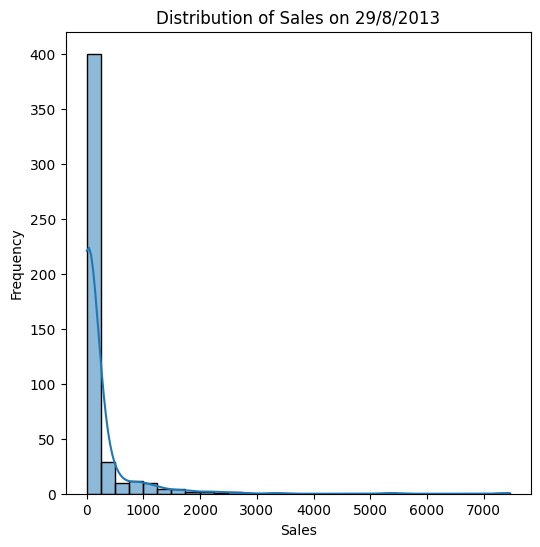

In [16]:
# 1. Distribution of sales in a specific month
plt.figure(figsize=(6, 6))
sns.histplot(sales_data['29-08-2013'], kde=True, bins=30)
plt.title('Distribution of Sales on 29/8/2013')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()